In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [2]:
df = pd.read_csv("sales_data_sample.csv", encoding='latin1')
print("Dataset Loaded Successfully")
print(df.head())
print(df.info())

Dataset Loaded Successfully
   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 r

In [3]:
df_numeric = df.select_dtypes(include=[np.number])

df_numeric = df_numeric.fillna(df_numeric.mean())

print("\nNumerical columns selected for clustering:")
print(df_numeric.columns)

scaler = StandardScaler()
X = scaler.fit_transform(df_numeric)

print("\nData Standardized Successfully")
print("Shape of data:", X.shape)



Numerical columns selected for clustering:
Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'MSRP'],
      dtype='object')

Data Standardized Successfully
Shape of data: (2823, 9)


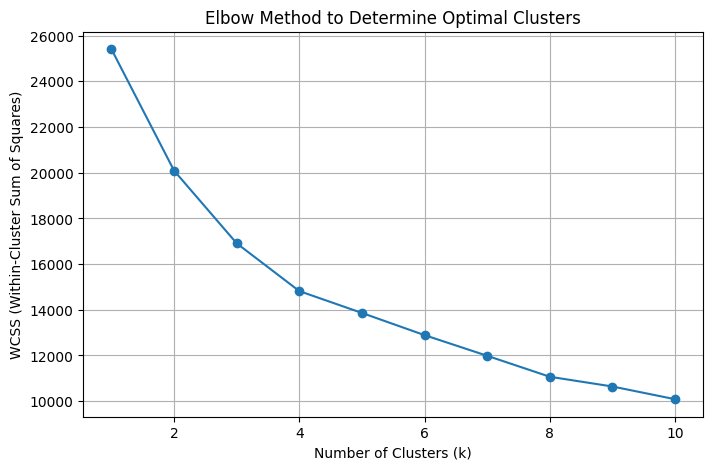

In [4]:
wcss = []

for i in range(1, 11): 
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method to Determine Optimal Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

In [6]:
optimal_k = 3  
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

df['Cluster'] = y_kmeans
print("\n K-Means Clustering Completed with", optimal_k, "clusters")


 K-Means Clustering Completed with 3 clusters


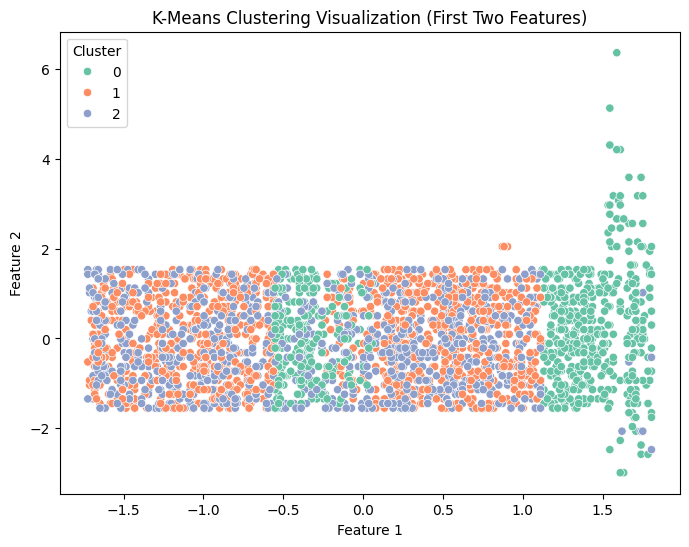

In [7]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_kmeans, palette='Set2')
plt.title("K-Means Clustering Visualization (First Two Features)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(title='Cluster')
plt.show()

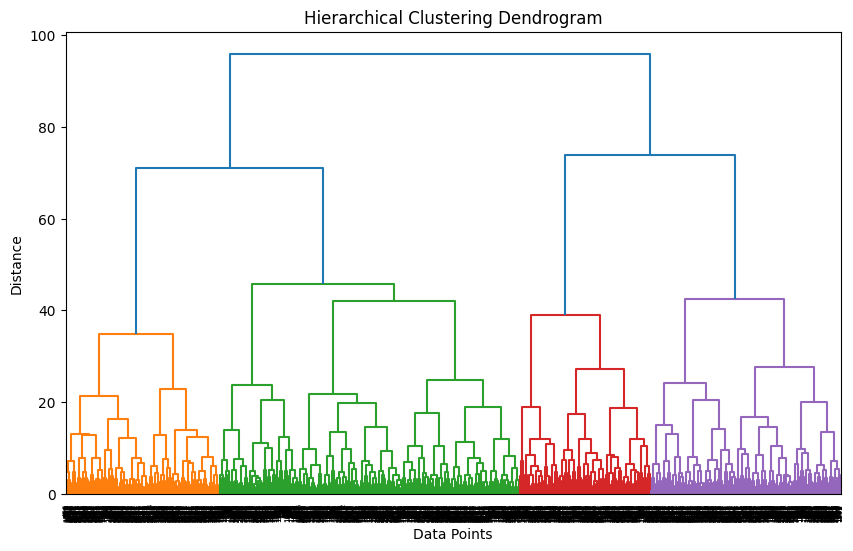

In [8]:
linked = linkage(X, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()